In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final/3D_Print_Jobs_cleaned.csv')
df.head()

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,Bambu Labs,0.0,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM"
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM"
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM"
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM"
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM"


Text(0.5, 0, 'Material used')

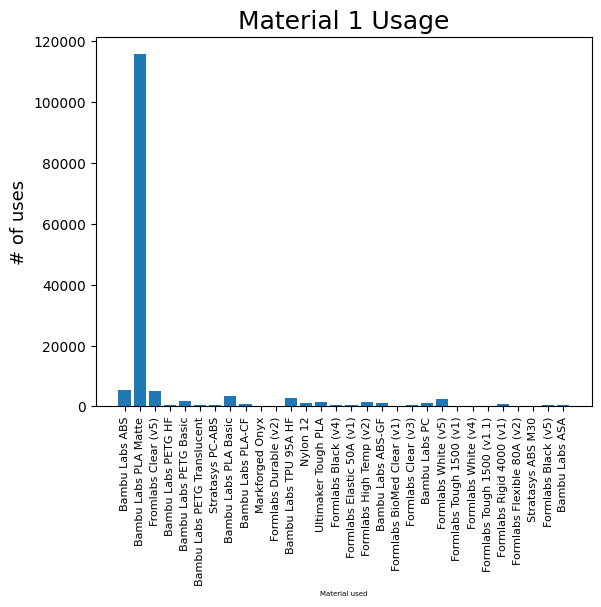

In [2]:
import matplotlib.pyplot as plt

material1names = df["Material 1"].unique()
material1names = [str(name) for name in material1names]
material1names = [name for name in material1names if name != 'nan']
material1uses = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(df)):
  for j in range(len(material1names)):
    if df["Material 1"][i] == material1names[j]:
      material1uses[j] += df["Material 1 Qty"][i]

rounded_material1uses = [round(num) for num in material1uses]
#print(rounded_material1uses)

ax = plt.bar(material1names, rounded_material1uses)
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.title("Material 1 Usage", fontsize=18)
plt.ylabel("# of uses", fontsize=13)
plt.xlabel("Material used", fontsize=5)

Text(0.5, 0, 'Material used')

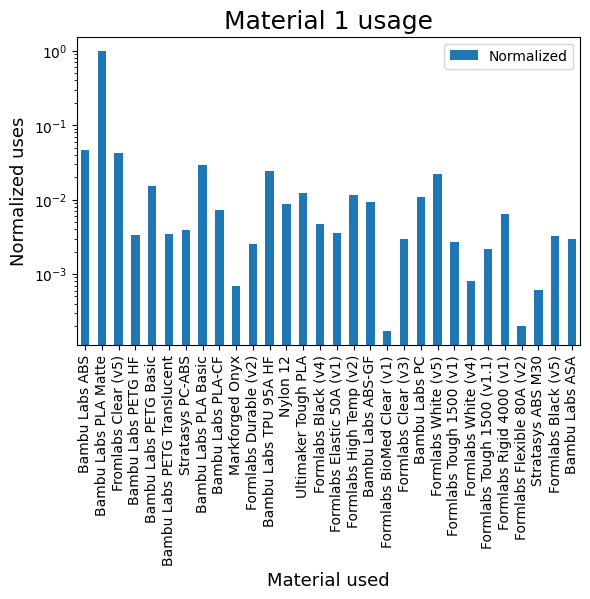

In [3]:
data = {'Category': material1names, 'Values': rounded_material1uses}
df1 = pd.DataFrame(data)

df1['Normalized'] = df1['Values'] / df1['Values'].max()

ax = df1.plot.bar(x="Category", y='Normalized', rot=90, figsize=(6.5,4), logy = True)
ax.set_title("Material 1 usage", fontsize=18)
ax.set_ylabel("Normalized uses", fontsize=13)
ax.set_xlabel("Material used", fontsize=13)

Text(0.5, 0, 'Material used')

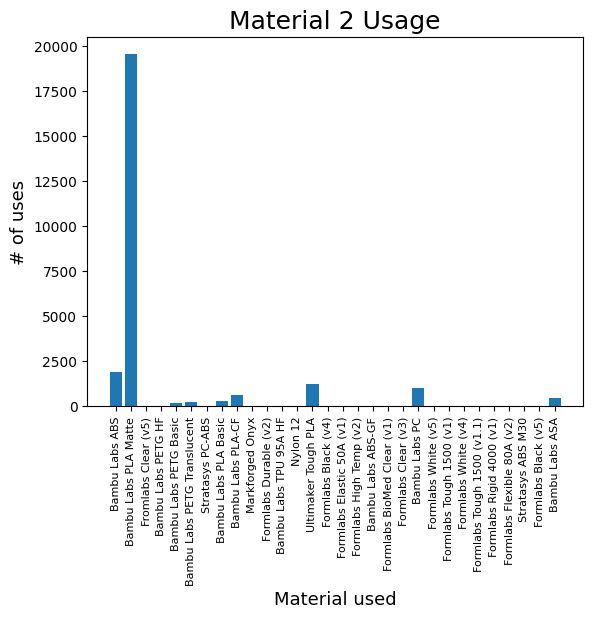

In [4]:
material2names = df["Material 2"].unique()
material2names = [str(name) for name in material2names]
material2names = [name for name in material1names if name != 'nan']

material2uses = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(df)):
  for j in range(len(material2names)):
    if df["Material 2"][i] == material2names[j]:
      material2uses[j] += df["Material 2 Qty"][i]

rounded_material2uses = [round(num) for num in material2uses]
#print(rounded_material2uses)

ax1 = plt.bar(material2names, rounded_material2uses)
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.title("Material 2 Usage", fontsize=18)
plt.ylabel("# of uses", fontsize=13)
plt.xlabel("Material used", fontsize=13)

Text(0.5, 0, 'Material used')

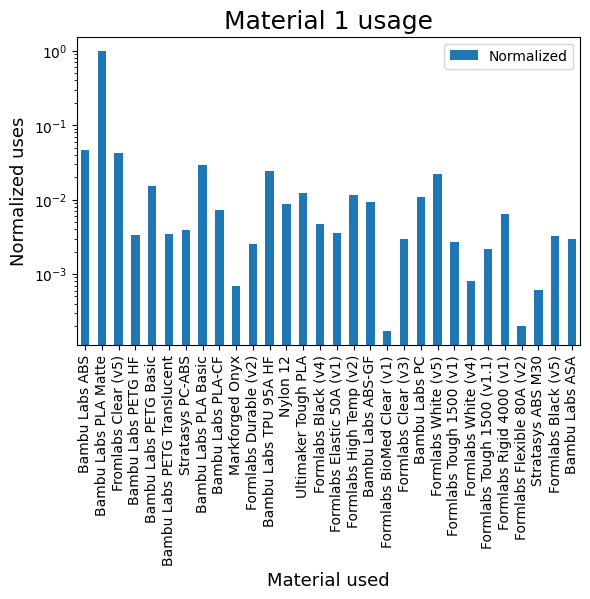

In [5]:
data = {'Category': material1names, 'Values': rounded_material1uses}
df2 = pd.DataFrame(data)

df2['Normalized'] = df2['Values'] / df2['Values'].max()

ax = df2.plot.bar(x="Category", y='Normalized', rot=90, figsize=(6.5,4), logy = True)
ax.set_title("Material 1 usage", fontsize=18)
ax.set_ylabel("Normalized uses", fontsize=13)
ax.set_xlabel("Material used", fontsize=13)

Text(0.5, 0, 'Printer used')

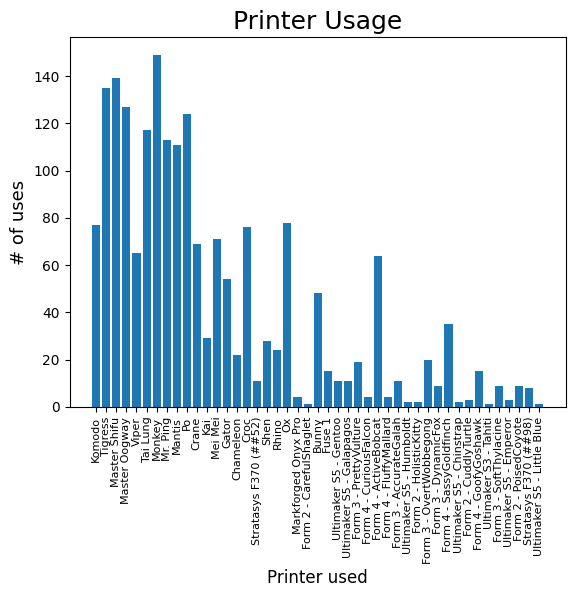

In [10]:
printernames = df["Select Printer"].unique()

printeruses = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(df)):
  for j in range(len(printernames)):
    if df["Select Printer"][i] == printernames[j]:
      printeruses[j] += 1

ax3 = plt.bar(printernames, printeruses)
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.title("Printer Usage", fontsize=18)
plt.ylabel("# of uses", fontsize=13)
plt.xlabel("Printer used", fontsize=12)

Text(0.5, 0, 'Printer used')

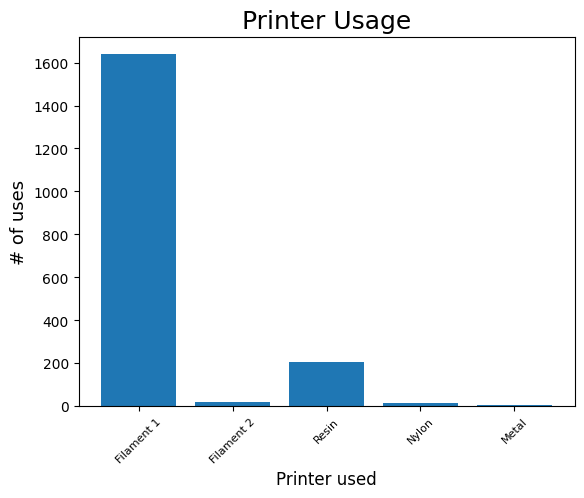

In [29]:
printernames = df["Select Printer"].unique()
printercategories = ['Filament 1', 'Filament 2', 'Resin', 'Nylon', 'Metal']

filament1 = 0
filaments1 = ['Komodo', 'Tigress', 'Master Shifu', 'Master Oogway', 'Viper', 'Tai Lung',
    'Monkey', 'Mr. Ping', 'Mantis', 'Po', 'Crane', 'Kai', 'Mei Mei', 'Gator',
    'Chameleon', 'Croc', 'Shen', 'Rhino', 'Ox', 'Ultimaker S5 - Gentoo', 'Ultimaker S5 - Galapagos',
    'Ultimaker S5 - Humboldt', 'Ultimaker S5 - Chinstrap', 'Ultimaker S3 - Tahiti',
    'Ultimaker S5 - Emperor', 'Ultimaker S5 - Little Blue']
for i in range(len(df)):
  if df["Select Printer"][i] in filaments1:
      filament1 += 1

filament2 = 0
filaments2 = ['Stratasys F370 (##52)', 'Stratasys F370 (##98)']
for i in range(len(df)):
  if df["Select Printer"][i] in filaments2:
    filament2 += 1

resin = 0
resins = ['Form 2 - CarefulShaglet', 'Form 3 - PrettyVulture', 'Form 4 - CuriousFalcon', 'Form 4 - ActiveBobcat',
 'Form 4 - FluffyMallard', 'Form 3 - AccurateGalah', 'Form 2 - HolisticKitty', 'Form 3 - OvertWobbegong', 'Form 3 - DynamicFox', 'Form 4 - SassyGoldfinch',
 'Form 2 - CuddlyTurtle','Form 4 - GoofyGoshawk','Form 3 - SoftThylacine','Form 2 - PoisedCoyote']
for i in range(len(df)):
  if df["Select Printer"][i] in resins:
    resin += 1

nylon = 0
nylons = ['Fuse 1']
for i in range(len(df)):
  if df["Select Printer"][i] in nylons:
    nylon += 1

metal = 0
metals = ['Markforged Onyx Pro']
for i in range(len(df)):
  if df["Select Printer"][i] in metals:
    metal += 1

ax = plt.bar(printercategories, [filament1, filament2, resin, nylon, metal])
plt.xticks(rotation=45)
plt.xticks(fontsize=8)
plt.title("Printer Usage", fontsize=18)
plt.ylabel("# of uses", fontsize=13)
plt.xlabel("Printer used", fontsize=12)